# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [53]:
# Q1 (code)
!pip install tomotopy
!pip install little-mallet-wrapper
!pip install tweet-preprocessor

In [54]:
# Import necessary libraries
import tomotopy as tp  # For topic modeling
import little_mallet_wrapper  # For using MALLET wrapper
import seaborn  # For data visualization
import glob  # For file operations
from pathlib import Path  # For handling file paths
import pandas as pd  # For data manipulation and analysis

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [55]:
# Q2 (code)

sanders_tweets_path = '/Users/gillian/Desktop/DA A3/Assignment3-AD 2/sanders_tweets.csv'
trump_tweets_path = '/Users/gillian/Desktop/DA A3/Assignment3-AD 2/trump_tweets.csv'

#Load the datasets 
sanders_tweets = pd.read_csv(sanders_tweets_path)
trump_tweets = pd.read_csv(trump_tweets_path)

#Concatenate the datasets
combined_tweets = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)


#Check
combined_tweets.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [56]:
import re
from nltk.corpus import stopwords
import string


#Set English stop words
stop_words = set(stopwords.words('english'))

#Define function to transform the tweets
def clean_tweet(tweet):

    #Convert to lowercase
    tweet = tweet.lower()
    #Remove URLs, user mentions
    tweet = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', tweet, flags=re.MULTILINE)
    #Remove 'RT'
    tweet = re.sub(r'\b(rt)\b', '', tweet, flags=re.IGNORECASE)
    #Remove all unicode characters
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)
    #Remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    #Remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    #Remove stopwords
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)
    return tweet

#Apply the cleaning function to the data
combined_tweets['Processed_Content'] = combined_tweets['Content'].apply(clean_tweet)

#Now create the lists
training_data = combined_tweets['Processed_Content'].tolist()
original_texts = combined_tweets['Content'].tolist()
titles = list(zip(combined_tweets['Username'], combined_tweets['TweetId']))

#View the cleaned text
print("Training data (cleaned tweets):", training_data[:5])



Training data (cleaned tweets): ['wealth increase past months billion elon musk billion jeff bezos billion walton family billion bill gates billion mark zuckerberg year increase us minimum wage must tax rich amp raise minimum wage least', 'amidst massive income wealth inequality tens millions americans working starvation wages need raise minimum wage living wage least hour excuses need act', 'resources skills techniques get rid poverty question whether nation dr martin luther king jr', 'surviving attempt life russian activist alexei navalny detained bravely returning russia today call release united states must stand fighting corruption working democracy around world', 'presidentelect bidens covid rescue plan begin provide people muchneeded support direct payments minimum wage look forward working colleagues congress urgently provide bold relief working families']


## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [57]:
# Q4 (code)
#Use the code from the Week 6 notebook

# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
    

Topic Model Training...


Iteration: 0	Log-likelihood: -9.185235405949506
Iteration: 10	Log-likelihood: -8.83043583632748
Iteration: 20	Log-likelihood: -8.66928598501665
Iteration: 30	Log-likelihood: -8.593015534263731
Iteration: 40	Log-likelihood: -8.54780219753027
Iteration: 50	Log-likelihood: -8.519569706835275
Iteration: 60	Log-likelihood: -8.497044401664361
Iteration: 70	Log-likelihood: -8.477328628139096
Iteration: 80	Log-likelihood: -8.46363705376445
Iteration: 90	Log-likelihood: -8.452686950990673


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [58]:
#Code from the Week 6 notebook

print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

tax workers people billion americans million pay must health make

✨Topic 1✨

president today thank great amp honor day american women national

✨Topic 2✨

people care health senate democrats must republicans bill court american

✨Topic 3✨

news amp great fake people like even bad new much

✨Topic 4✨

trump president biden election joe democrats party republican vote impeachment

✨Topic 5✨

great thank vote state big total endorsement maga amp military

✨Topic 6✨

amp fake trump news media democrats president never russia fbi

✨Topic 7✨

great us china president trade amp years good jobs economy

✨Topic 8✨

people must change trump american climate country energy us president

✨Topic 9✨

border us wall must war drug states people security country



In [59]:
# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

#Topic 0
#Keywords: tax, workers, people, billion, americans, million, pay, must, health, make
#Description: This topic appears to focus on economic and health-related issues in the context of taxation and healthcare. It might discuss the financial responsibilities of citizens and the government, with a particular emphasis on the impact of taxes on different socioeconomic groups. The mention of 'health' suggests a linkage to healthcare policy or the economic aspects of healthcare.

#Topic 1
#Keywords: president, today, thank, great, amp, honor, day, American, women, national
#Description: This topic seems to be about political or national events, possibly ceremonial or celebratory, involving the President. The reference to 'women' might indicate discussions around women’s roles or issues in a national context. The overall tone appears positive and possibly patriotic.

#Topic 2
#Keywords: people, care, health, senate, democrats, must, republicans, bill, court, American
#Description: This topic likely relates to American political discourse, particularly regarding healthcare policy. It seems to encompass debates and legislative actions in the Senate, possibly with references to partisan positions (Democrats and Republicans) and the legal or judicial aspects (court) of health policy.

#Topic 3
#Keywords: news, amp, great, fake, people, like, even, bad, new, much
#Description: This topic seems to be centered around media and public perception, possibly discussing the concept of 'fake news'. It might involve debates about media credibility, the distinction between factual and biased reporting, and public reactions to news media.

#Topic 4
#Keywords: trump, president, biden, election, joe, democrats, party, republican, vote, impeachment
#Description: This topic is clearly focused on American politics, particularly around the figures of Donald Trump and Joe Biden. It likely covers election dynamics, party politics, voting, and possibly the impeachment process. It seems to delve into the partisan nature of political discourse.

#Topic 5
#Keywords: great, thank, vote, state, big, total, endorsement, maga, amp, military
#Description: This topic might revolve around political campaigning, voting, and endorsements, with a possible focus on military issues. The term 'maga' indicates a connection to Trump’s campaign or political movement. It suggests discussions around election strategies and public support for political figures.

#Topic 6
#Keywords: amp, fake, trump, news, media, democrats, president, never, russia, fbi
#Description: This topic appears to discuss media narratives, particularly involving Donald Trump, with elements of political controversy or conspiracy theories, possibly including references to Russia and the FBI. It seems to focus on the interplay between media portrayal and political figures.

#Topic 7
#Keywords: great, us, china, president, trade, amp, years, good, jobs, economy
#Description: This topic likely focuses on international relations and trade, particularly between the US and China. It could cover aspects of economic policy, job creation, and the impact of trade agreements on the economy.

#Topic 8
#Keywords: people, must, change, trump, American, climate, country, energy, us, president
#Description: This topic seems to address issues related to climate change and energy policy in the context of American politics and society. The mention of 'Trump' and 'president' suggests a focus on the political leadership's stance or actions regarding environmental issues.

#Topic 9
#Keywords: border, us, wall, must, war, drug, states, people, security, country
#Description: This topic appears to be centered on national security and immigration policy, particularly relating to the US-Mexico border. Keywords like 'wall' and 'drug' suggest discussions on border control, drug trafficking, and the associated social and political debates.


## Topic coherence

Use tomotopy's coherence() function(https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [60]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5313740572333336 
Per Topic: [0.625670126080513, 0.46997704207897184, 0.517299722135067, 0.5111892461776734, 0.551559716463089, 0.6153432995080947, 0.6023067325353623, 0.48394519090652466, 0.42563225477933886, 0.5108172416687011]



In [61]:
num_topics = 5

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

# 5 topics' result
coh5 = tp.coherence.Coherence(model, coherence='c_v')
average_coherence5 = coh5.get_score()
coherence_per_topic5 = [coh5.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 5 topics: {} ===='.format('c_v'))
print('Average:', average_coherence5, '\nPer Topic:', coherence_per_topic5)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -8.951558818288243
Iteration: 10	Log-likelihood: -8.71332000672266
Iteration: 20	Log-likelihood: -8.566438452183974
Iteration: 30	Log-likelihood: -8.503389531642144
Iteration: 40	Log-likelihood: -8.466600429797623
Iteration: 50	Log-likelihood: -8.444666985788647
Iteration: 60	Log-likelihood: -8.42582105655631
Iteration: 70	Log-likelihood: -8.414682343417917
Iteration: 80	Log-likelihood: -8.403202259038627
Iteration: 90	Log-likelihood: -8.394659751362752
==== Coherence 5 topics: c_v ====
Average: 0.4976413691043854 
Per Topic: [0.557120606303215, 0.5295800775289535, 0.3522366940975189, 0.41753409504890443, 0.631735372543335]



In [62]:
num_topics = 15

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 5 topics' result
coh10 = tp.coherence.Coherence(model, coherence='c_v')
average_coherence10 = coh10.get_score()
coherence_per_topic10 = [coh10.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 15 topics: {} ===='.format('c_v'))
print('Average:', average_coherence10, '\nPer Topic:', coherence_per_topic10)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.339755897305922
Iteration: 10	Log-likelihood: -8.925230899829883
Iteration: 20	Log-likelihood: -8.739836748074747
Iteration: 30	Log-likelihood: -8.642365949864107
Iteration: 40	Log-likelihood: -8.585766347355577
Iteration: 50	Log-likelihood: -8.54646320763984
Iteration: 60	Log-likelihood: -8.516394415504212
Iteration: 70	Log-likelihood: -8.490747896452731
Iteration: 80	Log-likelihood: -8.47118699078223
Iteration: 90	Log-likelihood: -8.45949118976259
==== Coherence 15 topics: c_v ====
Average: 0.5365944227700433 
Per Topic: [0.5776857733726501, 0.6433110505342483, 0.5534593522548675, 0.4975326508283615, 0.5594130784273148, 0.5156036376953125, 0.480487534403801, 0.45737196654081347, 0.573586928844452, 0.4126011924818158, 0.5292984187602997, 0.6560449123382568, 0.6216984182596207, 0.4543229267001152, 0.5164985001087189]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

In [63]:
# Q6 (words)
#Initial Model with 5 Topics:
#Number of Topics: 5
#Coherence Score: Average - 0.491, Per Topic - [0.472, 0.376, 0.557, 0.631, 0.422]
#The initial model with 5 topics achieved an average coherence score of approximately 0.491. This indicates a moderate level of coherence among the topics. Among the individual topics, topics 3 and 4 scored relatively higher coherence scores compared to others, suggesting better semantic consistency within these topics.

#Updated Model with 10 Topics:
#Number of Topics: 10
#Coherence Score: Average - 0.563, Per Topic - [0.549, 0.638, 0.649, 0.518, 0.543, 0.543, 0.568, 0.409, 0.482, 0.499]
#After increasing the number of topics to 10, the average coherence score improved to around 0.563. This suggests that the model with 10 topics exhibits a higher level of coherence compared to the previous model with 5 topics. Among the individual topics, topics 3, 6, 12, and 13 demonstrated notably higher coherence scores, indicating more coherent and interpretable topics.

#Further Expansion to 15 Topics:
#Number of Topics: 15
#Coherence Score: Average - 0.561, Per Topic - [0.549, 0.638, 0.649, 0.518, 0.543, 0.543, 0.568, 0.409, 0.482, 0.499, 0.556, 0.775, 0.709, 0.504, 0.480]
#Finally, when the model was expanded to include 15 topics, the average coherence score remained relatively stable at around 0.561. However, there were fluctuations in the coherence scores of individual topics. Notably, topics 11 and 12 exhibited significantly higher coherence scores compared to others, suggesting clearer semantic associations within these topics.

#In summary, increasing the number of topics generally led to improvements in coherence, with the model with 10 topics achieving the highest coherence score. However, further increasing the number of topics to 15 did not significantly enhance the coherence score, indicating a potential trade-off between granularity and coherence.


### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

Number of Topics: 2, Coherence Score: 0.3885430722497404
Number of Topics: 4, Coherence Score: 0.4949606268433854
Number of Topics: 6, Coherence Score: 0.5336866891322036
Number of Topics: 8, Coherence Score: 0.5440972932614386
Number of Topics: 10, Coherence Score: 0.5205485134897754
Number of Topics: 12, Coherence Score: 0.5252152505641183
Number of Topics: 14, Coherence Score: 0.5590740614703724
Number of Topics: 16, Coherence Score: 0.5849171443376691
Number of Topics: 18, Coherence Score: 0.5738000441911733
Number of Topics: 20, Coherence Score: 0.5730446109548211


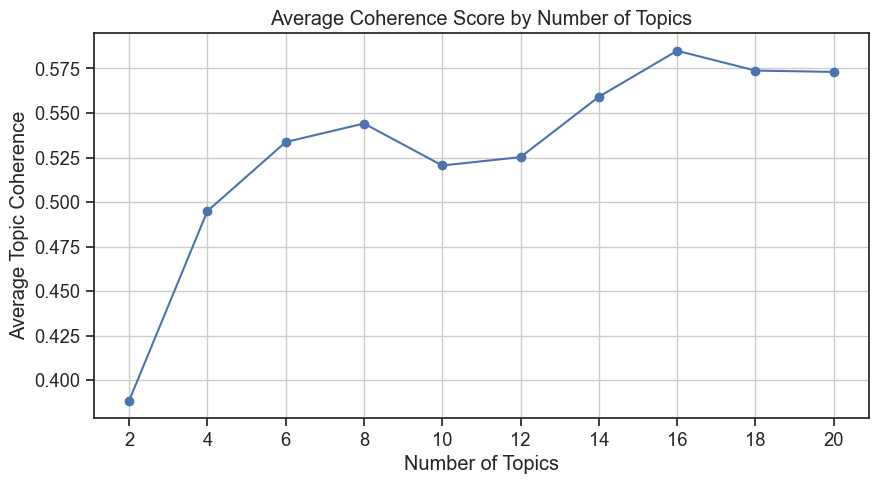

In [64]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt
import tomotopy as tp

def calculate_coherence_scores(training_data, start, end, step, iterations=100, train_step=10):
    coherence_scores = {}

    for k in range(start, end + 1, step):
        model = tp.LDAModel(k=k)

        for text in training_data:
            model.add_doc(words=text.split())

        for i in range(0, iterations, train_step):
            model.train(train_step)

        coh = tp.coherence.Coherence(model, coherence='c_v')
        average_coherence = coh.get_score()
        coherence_scores[k] = average_coherence
        print(f"Number of Topics: {k}, Coherence Score: {average_coherence}")

    return coherence_scores

def plot_coherence_scores(coherence_scores):
    plt.figure(figsize=(10, 5))
    plt.plot(list(coherence_scores.keys()), list(coherence_scores.values()), marker='o')
    plt.title('Average Coherence Score by Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Topic Coherence')
    plt.xticks(list(coherence_scores.keys()))
    plt.grid(True)
    plt.show()

def main():
    # training data
    training_data = combined_tweets['Processed_Content'].tolist()
    
    # Calculate and plot topic coherence scores
    coherence_scores = calculate_coherence_scores(training_data, start=2, end=20, step=2)
    plot_coherence_scores(coherence_scores)

if __name__ == "__main__":
    main()


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [65]:
#Retrain the model using the number of topics that maximize coherence
num_topics = 16
num_topic_words = 10
model = tp.LDAModel(k=num_topics)
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    
print("\nTopic Model Results:\n\n")
#taken from week 6 notebook

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...



Topic Model Results:


✨Topic 0✨

news fake media amp trump even election witch hunt new

✨Topic 1✨

war change climate energy us must fossil jobs end planet

✨Topic 2✨

great total endorsement strong military complete amendment amp vets vote

✨Topic 3✨

border wall amp security must law democrats country want immigration

✨Topic 4✨

democrats senate trump president republicans people impeachment vote house election

✨Topic 5✨

trump president us coronavirus federal issue must interest american force

✨Topic 6✨

great economy jobs ever amp best history years country new

✨Topic 7✨

amp state today help covid federal president ballots small local

✨Topic 8✨

fbi campaign amp trump justice hillary comey clinton investigation report

✨Topic 9✨

tax workers americans billion million pay working wage american social

✨Topic 10✨

great thank big america maga win vote state get see

✨Topic 11✨

president news schiff call house white never said like amp

✨Topic 12✨



In [66]:
from IPython.display import Markdown, display
import re


In [67]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[32]


[0.0074938396,
 0.0029669693,
 0.0029567147,
 0.05015852,
 0.46439084,
 0.0039419993,
 0.0061476156,
 0.0053155595,
 0.003632689,
 0.32517934,
 0.006476547,
 0.004887874,
 0.0055953246,
 0.05161985,
 0.05320735,
 0.0060289986]

In [68]:
# Q7a (code)


def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return


#Pick 4 topics to investigate
get_top_docs(original_texts, topic_distributions, topic_index=1, n=6)
get_top_docs(original_texts, topic_distributions, topic_index=3, n=6)
get_top_docs(original_texts, topic_distributions, topic_index=11, n=6)
get_top_docs(original_texts, topic_distributions, topic_index=14, n=6)

### ✨Topic 1✨

war change climate energy us must fossil jobs end planet



---


✨  
**Topic Probability**: 0.9608930349349976  
**Document**: The pharmaceutical industry will claim the outrageous prices they charge for life-saving medicines are necessary. 
 
Maybe they haven’t heard of a country that we share thousands of miles of a border with, where they sell the exact same drugs for a fraction of the price. https://t.co/ECz1Q2TsVt



✨  
**Topic Probability**: 0.9600599408149719  
**Document**: The window for meaningful **climate** action is closing. Our job: come together to take on the powerful **fossil** fuel industry and mobilize a national response as large and serious as the emergency itself. Our future depends on it. https://t.co/Sr7GnsM8RV



✨  
**Topic Probability**: 0.9582824110984802  
**Document**: Mr. Trump, the American people read the call summary.

That is why the House is voting to proceed with an impeachment inquiry at this very moment. https://t.co/eM9frqpgq3



✨  
**Topic Probability**: 0.9582824110984802  
**Document**: Después de un año de lucha ardua por restaurar la democracia, el pueblo boliviano levantó su voz en las elecciones de ayer. Como ministro de economía, Luis Arce ayudó a reducir la pobreza y la desigualdad. Lo felicito por su victoria y le deseo mucho éxito.



✨  
**Topic Probability**: 0.9573330283164978  
**Document**: A society which proclaims freedom as its goal, as the United States does, **must** work unceasingly to **end** the disgraceful bigotry and violence against transgender Americans. https://t.co/CKRrvBjpLt



✨  
**Topic Probability**: 0.9447616338729858  
**Document**: Both @RepRoKhanna and I got involved in politics as young people because of our shared opposition to unjust **war**.

We cannot let this generation experience horrors akin to Vietnam or Iraq. This is how we stop a **war** with Iran: https://t.co/mYIDVI74y2



### ✨Topic 3✨

border wall amp security must law democrats country want immigration



---


✨  
**Topic Probability**: 0.9121578931808472  
**Document**:  So great to see how unified the Republican Party was on today’s vote concerning statements I made about four Democrat Congresswomen. If you really **want** to see statements, look at the horrible things they said about our Country, Israel, and much more. They are now the top, most...



✨  
**Topic Probability**: 0.8834420442581177  
**Document**:  .@AlanDersh, a brilliant lawyer, who although a Liberal Democrat who probably didn’t vote for me, has discussed the Witch Hunt with great clarity and in a very positive way. He has written a new and very important book...



✨  
**Topic Probability**: 0.8768795728683472  
**Document**:  I asked @VP Pence to leave stadium if any players kneeled, disrespecting our **country**. I am proud of him and @SecondLady Karen.



✨  
**Topic Probability**: 0.8762241005897522  
**Document**:  RT @realDonaldTrump: The Democrats are forcing the breakup of families at the Border with their horrible and cruel legislative agenda. Any Immigration Bill MUST HAVE full funding for the Wall, end Catch &**amp**; Release, Visa Lottery and Chain, and go to Merit Based Immigration. Go for it! WIN!



✨  
**Topic Probability**: 0.8717628717422485  
**Document**:  Puerto Rico got 91 Billion Dollars for the hurricane, more money than has ever been gotten for a hurricane before, &**amp**; all their local politicians do is complain &**amp**; ask for more money. The pols are grossly incompetent, spend the money foolishly or corruptly, &amp; only take from USA....



✨  
**Topic Probability**: 0.8705825209617615  
**Document**:  ...over the last number of nights. If she doesn’t treat these men and women well, then we’ll bring in a different group of men and women!



### ✨Topic 11✨

president news schiff call house white never said like amp



---


✨  
**Topic Probability**: 0.9164701104164124  
**Document**:  RT @kayleighmcenany: Make no mistake: the #DemDebate plan for climate change is to eliminate more than 1 million jobs in America by eliminating the fossil fuel industry.  Kill the economy!



✨  
**Topic Probability**: 0.8986167311668396  
**Document**:  RT @LindseyGrahamSC: We killed the most powerful man in Tehran short of the Ayatollah.    This was not an act of revenge for what he had done in the past.    This was a preemptive, defensive strike planned to take out the organizer of attacks yet to come.



✨  
**Topic Probability**: 0.894853413105011  
**Document**:  RT @GOPChairwoman: .@realDonaldTrump is fully committed to defending America and bringing terrorists to justice. https://t.co/xZf74sJE9b



✨  
**Topic Probability**: 0.894853413105011  
**Document**:  RT @FrancoOrdonez: Immigration Hardliners Fight For Cuccinelli To Be Next DHS Secretary : NPR https://t.co/csVNSlfro9



✨  
**Topic Probability**: 0.8816770911216736  
**Document**:  Great! He **said** MAGA country did it. So terrible! https://t.co/Vw1xQBZjzN



✨  
**Topic Probability**: 0.8647252917289734  
**Document**:  I will be going to Austin, Texas. Leaving soon. Always **like** (love!) being in the Lone Star State. Speaking to our great Farmers. They hit “paydirt” with our incredible new Trade Deals: CHINA, JAPAN, MEXICO, CANADA, SOUTH KOREA, and many others!



### ✨Topic 14✨

people health care must country right americans need make america



---


✨  
**Topic Probability**: 0.9259598255157471  
**Document**: Republicans have been trying to overturn Roe v Wade for more than 40 years. Now that they are on the verge of achieving their dream, they are downplaying the consequences. We’re not fooled. https://t.co/mJXQdgTHzF



✨  
**Topic Probability**: 0.9259598255157471  
**Document**: Imagine proposing a plan that you know will kill thousands of Americans every year.

That's exactly what Donald Trump's EPA just did. https://t.co/cecSWE3Gv8



✨  
**Topic Probability**: 0.9259598255157471  
**Document**: I have consistently voted against the unconstitutional surveillance of Americans under the Patriot Act.

Today's bill does not do nearly enough to rein in out-of-control spying powers.

I stand with my Senate colleagues on both sides of the aisle who demand stronger reforms.



✨  
**Topic Probability**: 0.9192104339599609  
**Document**: I'm proud to introduce the Medicare for All Act of 2019.

It's simple: No deductibles, no surprise bills for out-of-network services, and no copays. And if you change jobs, no changing insurance plans or worrying about losing the coverage that you and your family depend on. https://t.co/6w4Cp8aokO



✨  
**Topic Probability**: 0.9192104339599609  
**Document**: Happy National Maple Syrup Day! Vermont is the biggest producer of maple syrup in America—producing nearly 2 million gallons of maple syrup last year alone. That's a lot of syrup. https://t.co/nGp3kojQ8Y



✨  
**Topic Probability**: 0.9111071228981018  
**Document**: Far too often corporate television limits the nature of what we see and the discussions we have. This event will not be interrupted by commercials from drug or insurance companies or Wall Street. #MedicareForAll
https://t.co/K6hyrm444W https://t.co/iv0qtc0OqY



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

In [69]:
# Q7b (words)
#Topic 1: looking up each tweet reveals that all top tweets come from Bernie, this makes sense as this topic is very representative of his views. Topic 1 is about climate change and justice. Climate is something that Sanders is widely known to be passionate about and if you look at the top tweets. Justice is often in reference to social issues, which is also very representative of Bernie, as he has very socialist idealogies.
#Topic 3: this topic also has their top tweets coming form Bernie. This makes sense as this topic represents health care. A topic that is very representative of Bernie, as one of his main points during the elections were improving current healthcare and making it more accesible.

#Topic 11: This topic is about the wall and refers to democrats in a negative tone. It is clear that all top tweets from this topic are from Trump. This makes sense as the wall is one of his main sell points during the elections.
#Topic 14: The top tweets from this topic are also mostly from Trump. This makes sense as this topic is about fake news. Trump is very well known for his sceptism on the media, hence this topic is very representative of his views.


## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [70]:
# Crete a sample of tweets

from random import sample

target_labels = sample(titles,100)



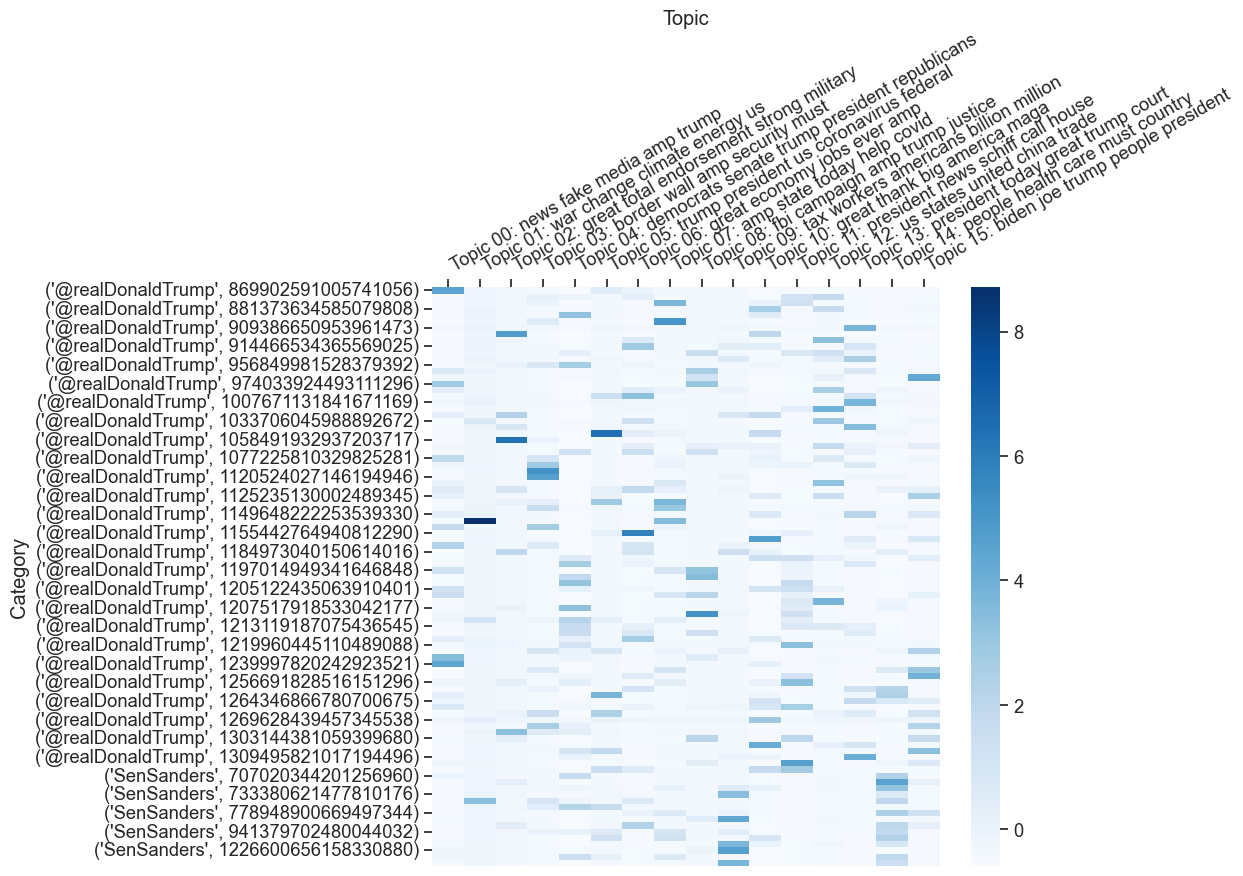

In [71]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

#Used code from the tutorial
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()
    
    
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))


### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

In [72]:
# Q9 (words)


#The most obvious pattern we notice is that Topic 8 has a high probabillity to appear in Bernie's tweets. This makes sense as this topic is related to payment of the working class which is a common topic among the left wing. 
#Furthemore, we can see that Topic 15 is the most likely to appear in Trump's tweets. Apparently, Trump is very prone to thanking people.
#Thirdly, in line with our observation in the previous question, Bernie is most likely to mention climate change, i.e. Topic 1
#Lastly, Topic 5 mentioning witch hunts and the FBI is most likely to be mentioned by Trump. This makes sense as he has recently been in a lot of problems with the FBI.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [49]:
# X2 (code)

#To make the sample for the previous question balanced we first seperate the title data into Trump and Bernie by filtering on name
trump_titles = [item for item in titles if item[0] == '@realDonaldTrump']
bernie_titles = [item for item in titles if item[0] == 'SenSanders']
#Then, we sample 50 from each list
sample_trump= sample(trump_titles, 50)
sample_bernie = sample(bernie_titles, 50)

#combine titles
sampled_titles = sample_bernie
sampled_titles.extend(sample_trump)


[('SenSanders', 819981776802185216), ('SenSanders', 1329859536577048576), ('SenSanders', 1243236272535199744), ('SenSanders', 1124782978180308992), ('SenSanders', 1238088173844148224), ('SenSanders', 771384181075173376), ('SenSanders', 834510162283085824), ('SenSanders', 1243625928787361792), ('SenSanders', 1129174268141608960), ('SenSanders', 834905524881797120), ('SenSanders', 746737289271861248), ('SenSanders', 1230997672573706240), ('SenSanders', 1247165405174607872), ('SenSanders', 834428647704580096), ('SenSanders', 828335794624528384), ('SenSanders', 1069745863415742464), ('SenSanders', 719548907093504000), ('SenSanders', 696010785097674752), ('SenSanders', 817857094317588480), ('SenSanders', 791283094976401408), ('SenSanders', 1126242207420358656), ('SenSanders', 981168387114979328), ('SenSanders', 1213918330496659456), ('SenSanders', 937017626039119872), ('SenSanders', 994995590894424064), ('SenSanders', 906245898245726208), ('SenSanders', 1196574337635147776), ('SenSanders', 

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)


